In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = ['front', 'stop']

data = np.concatenate([
    np.load('angle/seq_front_1661847653.npy'),
    np.load('angle/seq_stop_1661847653.npy')
], axis=0)

data.shape

FileNotFoundError: [Errno 2] No such file or directory: 'angle/seq_front_1661847653.npy'

In [ ]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(31389, 30, 6)
(31389,)


In [ ]:
from keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(31389, 2)

In [ ]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(28250, 30, 6) (28250, 2)
(3139, 30, 6) (3139, 2)


In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(10, activation = 'relu', input_shape=(30,138)))
model.add(Dense(5))
model.add(Dense(1))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                5960      
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 6,021
Trainable params: 6,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train,y_train,validation_data=(x_val, y_val),epochs=10,callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)


Epoch 1/10


ValueError: in user code:


    ValueError: Input 0 is incompatible with layer sequential: expected shape=(None, None, 138), found shape=(None, 30, 6)


In [ ]:
model.save("model1.h5")

KeyError: 'acc'

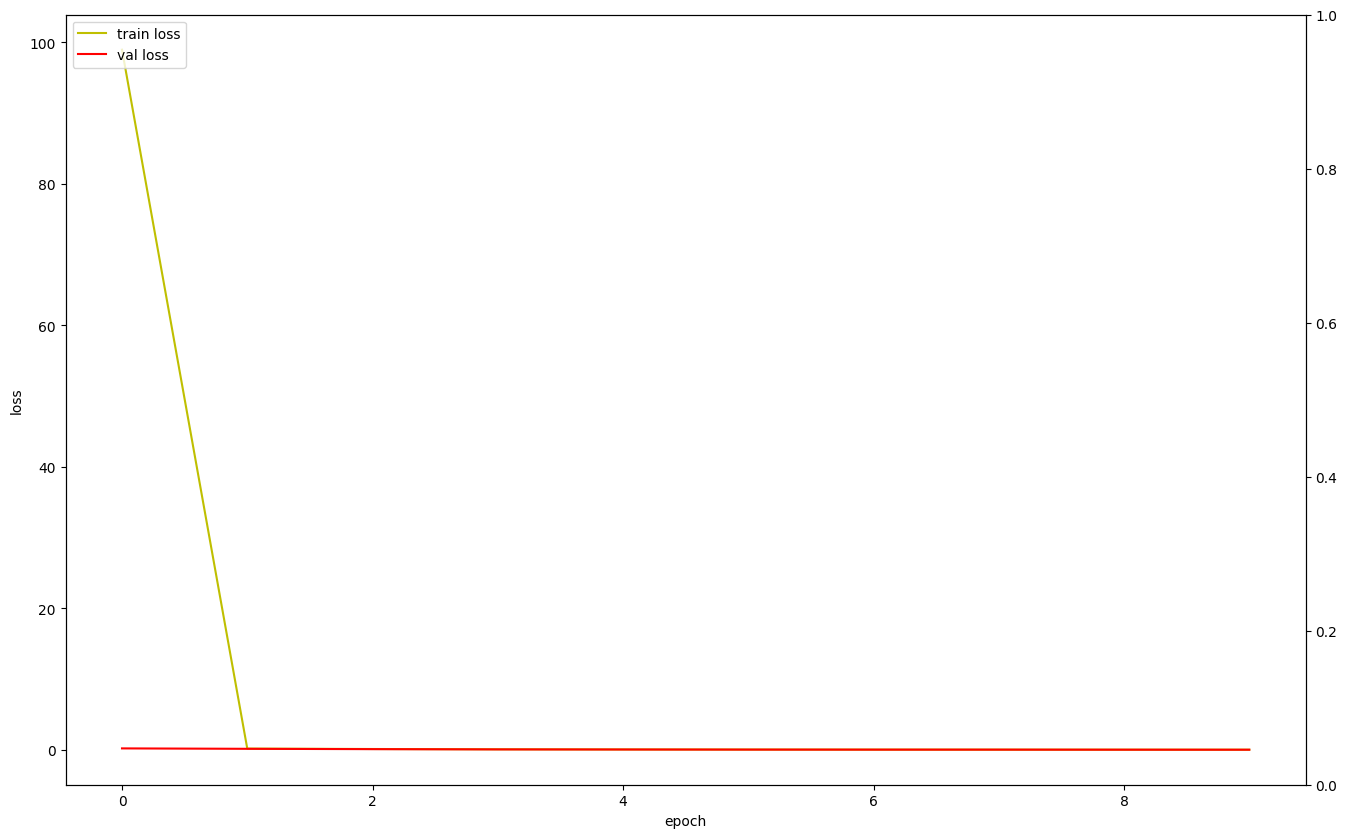

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from keras.models import load_model

model = load_model('my_model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

69/69 [==============================] - 0s 2ms/step


array([[[   0,    0],
        [   0, 2195]]], dtype=int64)